# 1. Import Necessary Libraries

In [1]:
import numpy as np
import pandas as pd
import seaborn as sns 
import matplotlib.pyplot as plt
import sklearn
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import GridSearchCV

from sklearn.model_selection import train_test_split

from sklearn.metrics import roc_curve, auc,classification_report,accuracy_score
from sklearn.metrics import mean_squared_error ,mean_absolute_error,log_loss
from sklearn.metrics import confusion_matrix

import warnings
warnings.filterwarnings('ignore')

# 2. Read In and Explore the Data

In [2]:
# import scikit learn databases
from sklearn import datasets
# import california housing data from sklearn and store data into a variable
calihouses = datasets.fetch_california_housing()
calidata = calihouses.data

In [3]:
headers = calihouses.feature_names
df = pd.DataFrame(calidata, columns=headers)
print(df.shape)

(20640, 8)


In [4]:
df.head()

MedInc  HouseAge  AveRooms  AveBedrms  Population  AveOccup  Latitude  \
0  8.3252      41.0  6.984127   1.023810       322.0  2.555556     37.88   
1  8.3014      21.0  6.238137   0.971880      2401.0  2.109842     37.86   
2  7.2574      52.0  8.288136   1.073446       496.0  2.802260     37.85   
3  5.6431      52.0  5.817352   1.073059       558.0  2.547945     37.85   
4  3.8462      52.0  6.281853   1.081081       565.0  2.181467     37.85   

   Longitude  
0    -122.23  
1    -122.22  
2    -122.24  
3    -122.25  
4    -122.25

In [5]:
df['price'] = calihouses.target

In [6]:
df

MedInc  HouseAge  AveRooms  AveBedrms  Population  AveOccup  Latitude  \
0      8.3252      41.0  6.984127   1.023810       322.0  2.555556     37.88   
1      8.3014      21.0  6.238137   0.971880      2401.0  2.109842     37.86   
2      7.2574      52.0  8.288136   1.073446       496.0  2.802260     37.85   
3      5.6431      52.0  5.817352   1.073059       558.0  2.547945     37.85   
4      3.8462      52.0  6.281853   1.081081       565.0  2.181467     37.85   
...       ...       ...       ...        ...         ...       ...       ...   
20635  1.5603      25.0  5.045455   1.133333       845.0  2.560606     39.48   
20636  2.5568      18.0  6.114035   1.315789       356.0  3.122807     39.49   
20637  1.7000      17.0  5.205543   1.120092      1007.0  2.325635     39.43   
20638  1.8672      18.0  5.329513   1.171920       741.0  2.123209     39.43   
20639  2.3886      16.0  5.254717   1.162264      1387.0  2.616981     39.37   

       Longitude  price  
0        -122.23  4.526  
1        -122.22  3.585  
2        -122.24  3.521  
3        -122.25  3.413  
4        -122.25  3.422  
...          ...    ...  
20635    -121.09  0.781  
20636    -121.21  0.771  
20637    -121.22  0.923  
20638    -121.32  0.847  
20639    -121.24  0.894  

[20640 rows x 9 columns]

# 3. Exploratory Data Analysis Data Visualization

## A.Univariate analysis

## i. Histograms /Categorical Plots

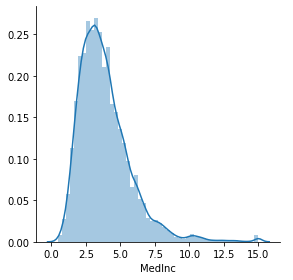

In [20]:
sns.FacetGrid(df,height=4)\
    .map(sns.distplot,'MedInc')\
    .add_legend();
plt.show()

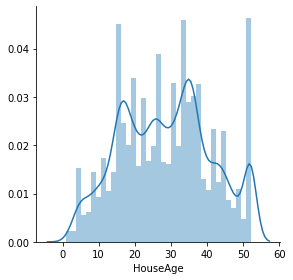

In [21]:
sns.FacetGrid(df,height=4)\
    .map(sns.distplot,'HouseAge')\
    .add_legend();
plt.show()

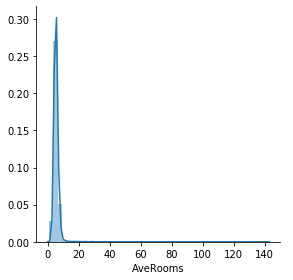

In [22]:
sns.FacetGrid(df,height=4)\
    .map(sns.distplot,'AveRooms')\
    .add_legend();
plt.show()

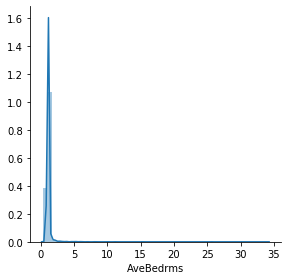

In [23]:
sns.FacetGrid(df,height=4)\
    .map(sns.distplot,'AveBedrms')\
    .add_legend();
plt.show()

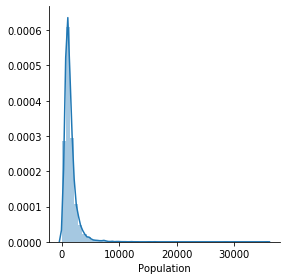

In [24]:
sns.FacetGrid(df,height=4)\
    .map(sns.distplot,'Population')\
    .add_legend();
plt.show()

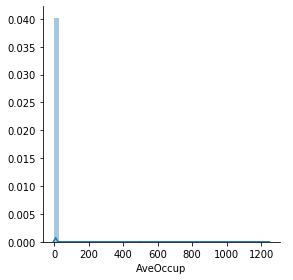

In [25]:
sns.FacetGrid(df,height=4)\
    .map(sns.distplot,'AveOccup')\
    .add_legend();
plt.show()

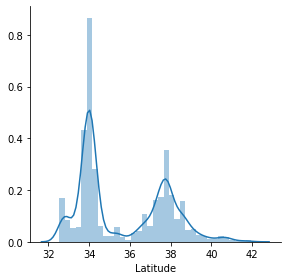

In [26]:
sns.FacetGrid(df,height=4)\
    .map(sns.distplot,'Latitude')\
    .add_legend();
plt.show()

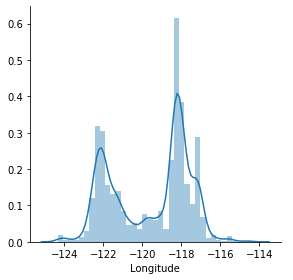

In [27]:
sns.FacetGrid(df,height=4)\
    .map(sns.distplot,'Longitude')\
    .add_legend();
plt.show()

In [32]:
df.columns

Index(['MedInc', 'HouseAge', 'AveRooms', 'AveBedrms', 'Population', 'AveOccup',
       'Latitude', 'Longitude', 'price'],
      dtype='object')

In [7]:
MedInc_transformed = np.log(df['MedInc']+ 1)
df['MedInc']=MedInc_transformed

AveRooms_transformed = np.log(df['AveRooms']+ 1)
df['AveRooms']=AveRooms_transformed

AveOccup_transformed = np.log(df['AveOccup']+ 1)
df['AveOccup']=AveOccup_transformed

Population_transformed = np.log(df['Population']+ 1)
df['Population']=Population_transformed

AveBedrms_transformed = np.log(df['AveBedrms']+ 1)
df['AveBedrms']=AveBedrms_transformed

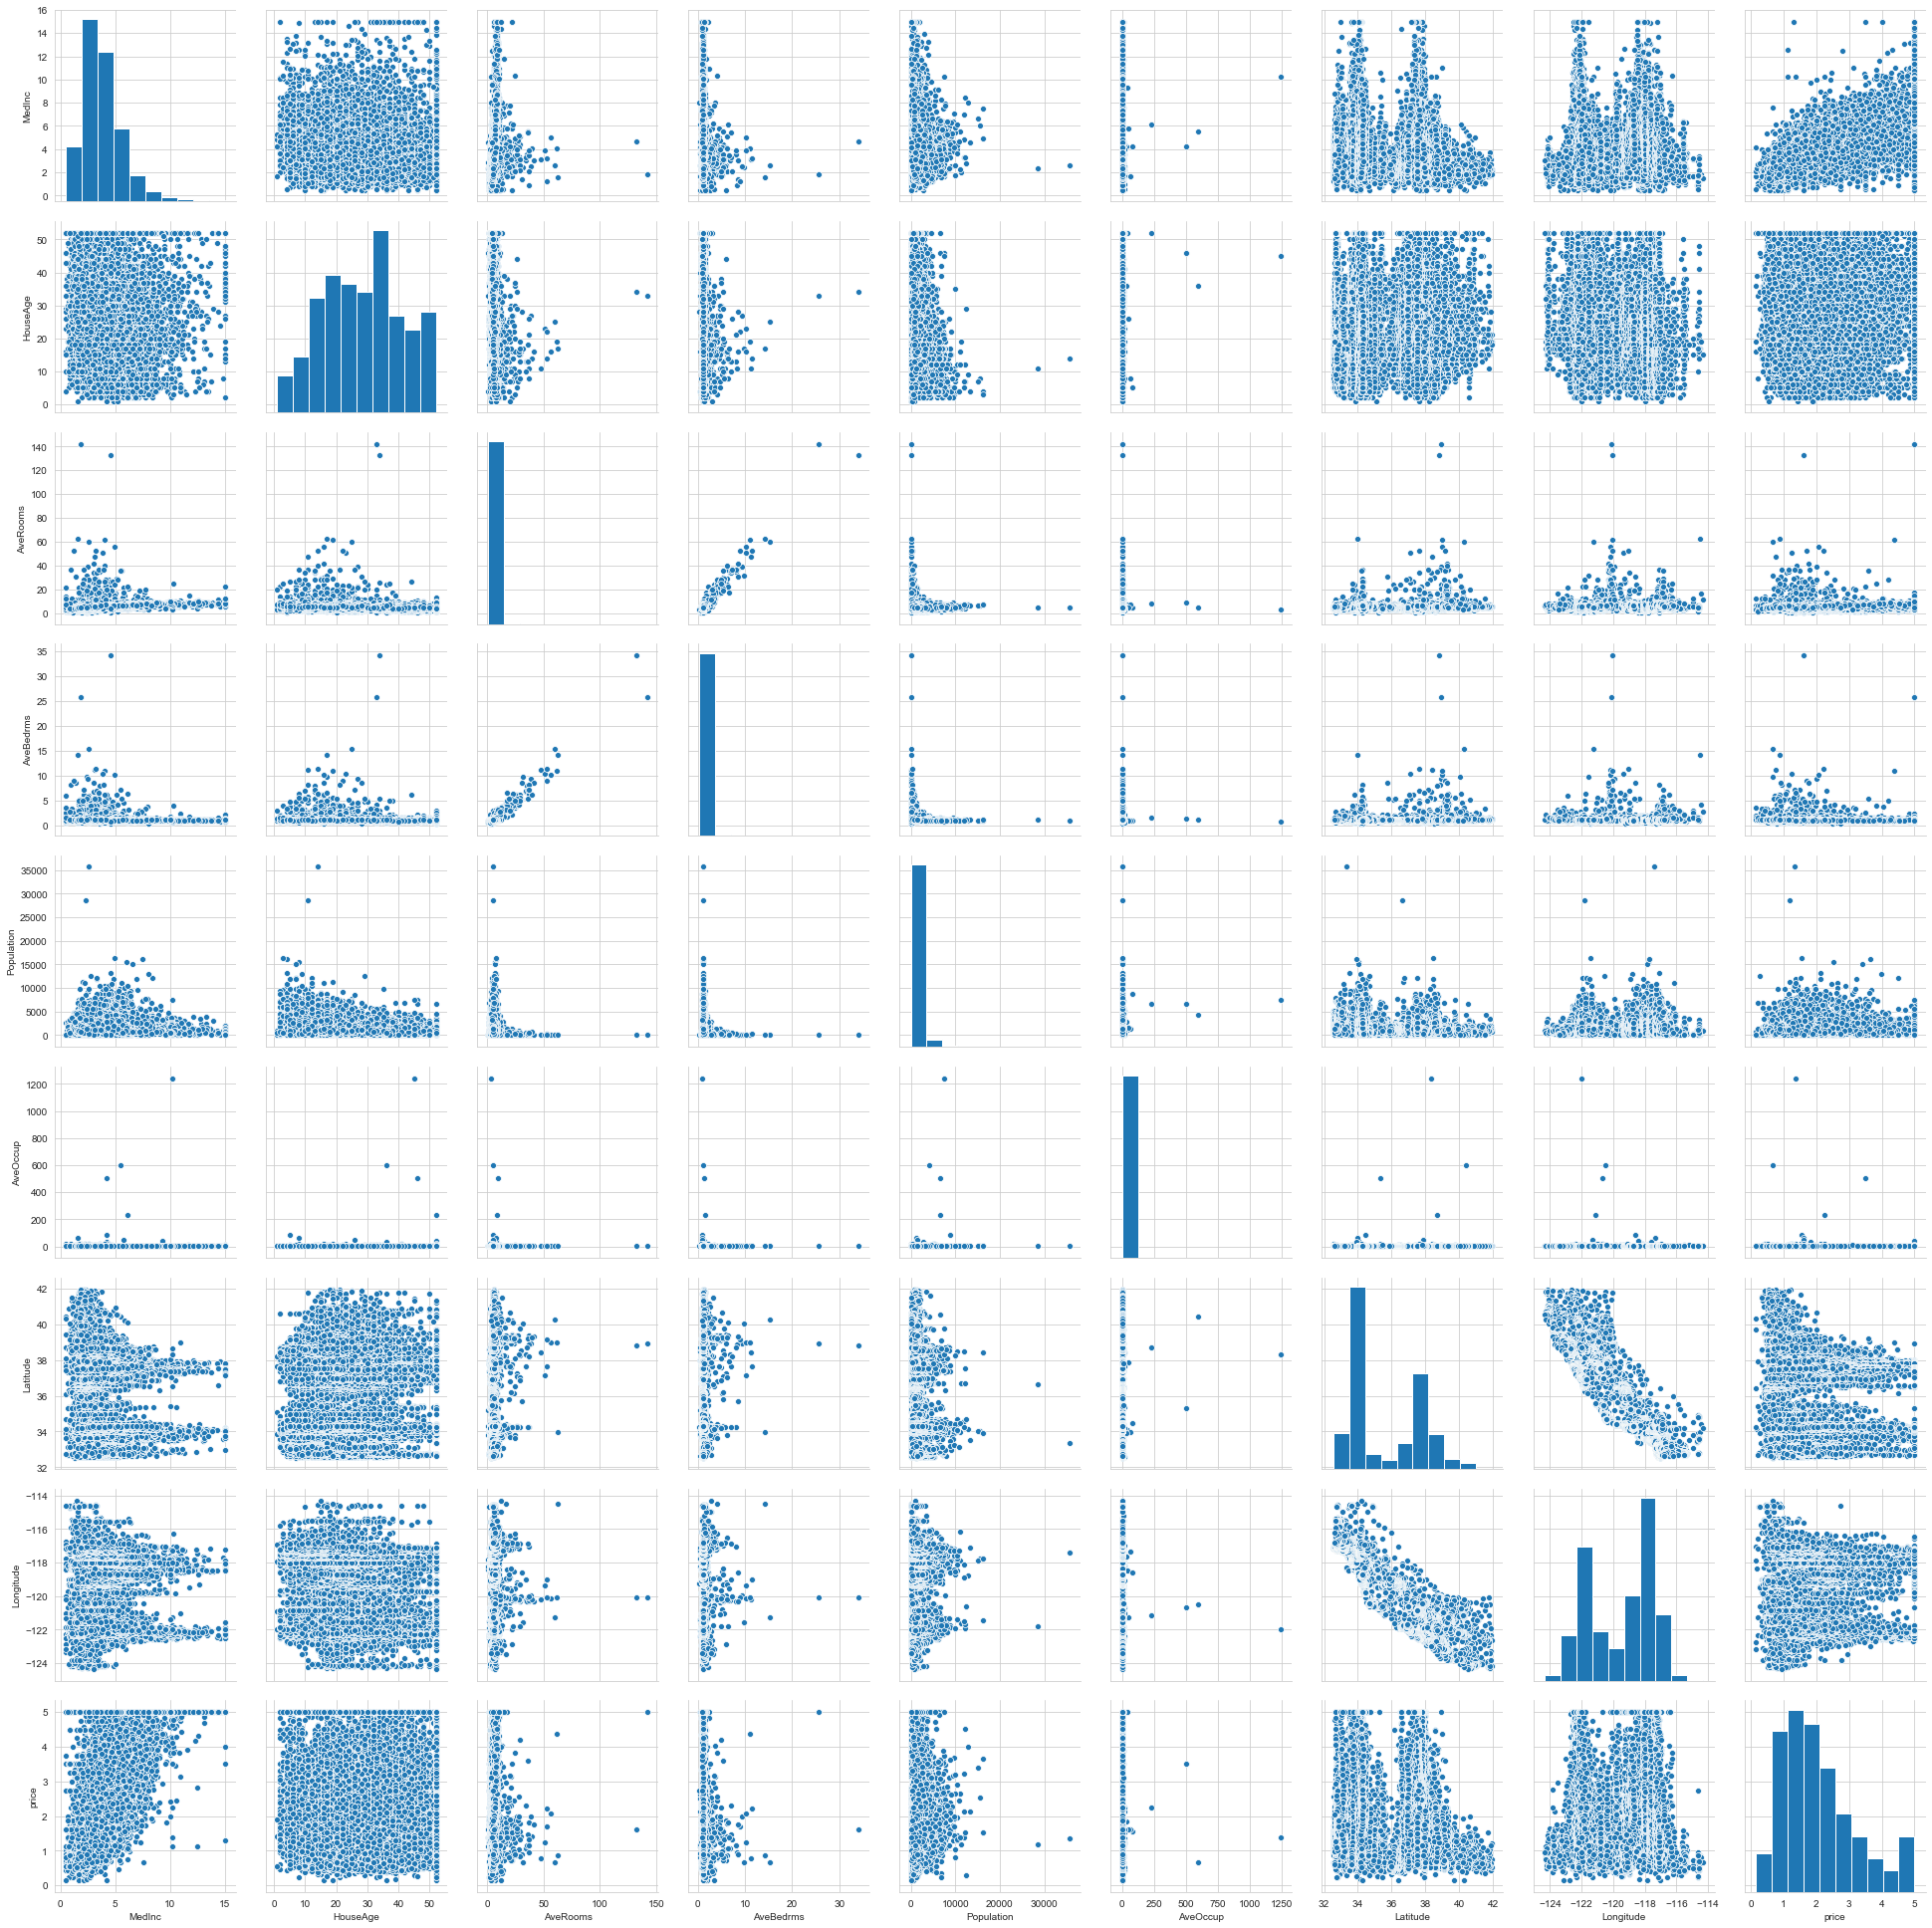

In [28]:
sns.set_style("whitegrid");               #Step1:Set the gird to white.
sns.pairplot(df,vars=df.columns,height=3); #.pairplot(dataset,hue='',size=n) function to plot pairplot
plt.show()

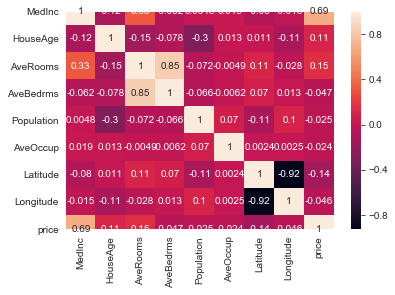

In [29]:
corr=df.corr()
sns.heatmap(corr, annot=True)

# 4. Data pre-processing and cleaning

## A. Cleaning data Manually

#### Other way to remove outliers is zscore but it needs all fetures to be numerical

In [30]:
# If data has outliers then we can remove them by using zscore<br>
#from scipy import stats
#z=abs(stats.zscore(df_train))
#print(np.where(z>3))
#df_train=df_train[(z<3).all(axis=1)]

## B.Converting all features to numerical features 

#### First we need to convert the string values to int so that we can apply the distance based models like KNN 

## C.Removing Unwanted columns

## D.Removing outliers using standard methods

In [8]:
# If data has outliers then we can remove them by using zscore<br>
from scipy import stats
z=abs(stats.zscore(df))
print(np.where(z>3))
df=df[(z<3).all(axis=1)]

(array([   50,    59,    61, ..., 20502, 20527, 20625], dtype=int64), array([2, 4, 4, ..., 4, 5, 4], dtype=int64))


### E .Train_test Split

In [9]:
y=df['price']
x=df.drop(['price'],axis=1)


In [10]:
X_train, X_test, y_train, y_test = train_test_split(x, y, test_size=0.33, random_state=42)

In [11]:
round(X_train, 2)

MedInc  HouseAge  AveRooms  AveBedrms  Population  AveOccup  Latitude  \
12656    0.99      32.0      1.68       0.72        7.38      1.35     38.51   
5566     1.32      23.0      1.78       0.72        7.46      1.49     33.92   
13578    1.04      29.0      1.60       0.74        7.26      1.31     34.13   
19067    1.92      20.0      2.10       0.74        7.23      1.38     38.28   
5581     1.38      27.0      1.60       0.74        7.64      1.35     33.83   
...       ...       ...       ...        ...         ...       ...       ...   
11661    1.81      34.0      1.86       0.67        7.71      1.50     33.81   
12426    1.25      23.0      1.78       0.77        6.98      1.72     33.63   
5610     1.11      27.0      1.53       0.72        7.45      1.55     33.78   
874      1.77      31.0      1.85       0.71        7.95      1.40     37.56   
16408    1.33      32.0      1.80       0.76        7.20      1.45     37.95   

       Longitude  
12656    -121.46  
5566     -118.29  
13578    -117.28  
19067    -122.45  
5581     -118.31  
...          ...  
11661    -118.02  
12426    -116.20  
5610     -118.26  
874      -122.03  
16408    -121.23  

[13316 rows x 8 columns]

# 5. Building Models

<b>Note: Applied bith LOOCV and K fold cross validation on Decisiontree <b>

# Model1 : KNN

In [38]:
from sklearn.model_selection import GridSearchCV
from sklearn.neighbors import KNeighborsRegressor
neigh = KNeighborsRegressor()

parameters = {'n_neighbors': range(1,100,10)}

clf = GridSearchCV(neigh, parameters, cv= 5)

clf.fit(X_train, y_train)



GridSearchCV(cv=5, error_score='raise-deprecating',
             estimator=KNeighborsRegressor(algorithm='auto', leaf_size=30,
                                           metric='minkowski',
                                           metric_params=None, n_jobs=None,
                                           n_neighbors=5, p=2,
                                           weights='uniform'),
             iid='warn', n_jobs=None,
             param_grid={'n_neighbors': range(1, 100, 10)},
             pre_dispatch='2*n_jobs', refit=True, return_train_score=False,
             scoring=None, verbose=0)

In [39]:
clf.best_params_

{'n_neighbors': 11}

In [40]:
#KNN classifier sklearn : https://scikit-learn.org/stable/modules/generated/sklearn.neighbors.KNeighborsClassifier.html
from sklearn.neighbors import KNeighborsRegressor
from sklearn.metrics import r2_score

neigh = KNeighborsRegressor(n_neighbors=11)
neigh.fit(X_train, y_train)

y_test_pred = neigh.predict(X_test)
print(r2_score(y_test,y_test_pred))


0.6266521302749501


# Model 3 : Linear regression 

In [43]:
from sklearn.linear_model import LinearRegression
Lr = LinearRegression()
Lr.fit(X_train, y_train)

y_test_pred = Lr.predict(X_test)

print(r2_score(y_test,y_test_pred))

0.6347120523218613


# Model 4 : SVM

In [ ]:
from sklearn.svm import SVR

parameters = [{'C': [0.1, 1, 10, 100, 1000],  
              'gamma': [1, 0.1, 0.01, 0.001, 0.0001], 
              'kernel': ['rbf']}]   #'poly','sigmoid' takes too much time

model = GridSearchCV(SVR(),parameters, cv=5)
model.fit(X_train, y_train)    

print(model.best_estimator_)
print(model.score(X_train, y_train))

In [75]:
model.best_params_

{'C': 1000, 'gamma': 0.001, 'kernel': 'rbf'}

In [77]:
from sklearn.model_selection import cross_val_score

C= [10**-4, 10**-2, 10**0, 10**2, 10**4]
k_scores = []

for k in C:
    #
    svm = SVR(C=k,gamma= 0.0001,kernel='rbf')
    
    scores = cross_val_score(svm,X_train, y_train, cv=10)
    
    k_scores.append(scores.mean())
print(k_scores)

[-0.02797320406000601, -0.027975467846709946, -0.027984990947256594, -0.04594326848375248, 0.5694206950394539]


In [78]:
import math as mt
log_C=[]
for i in C:
     log_C.append(mt.log10(i))

Text(0, 0.5, 'Cross-Validated Accuracy')

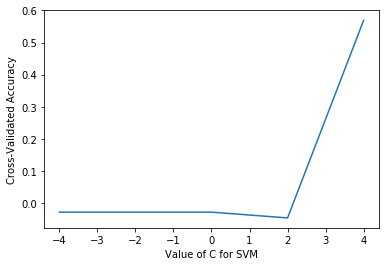

In [80]:
# plot the value of K for KNN (x-axis) versus the cross-validated accuracy (y-axis)
plt.plot(log_C, k_scores)
plt.xlabel('Value of C for SVM')
plt.ylabel('Cross-Validated Accuracy')

In [82]:
from sklearn.svm import SVR

clf = SVR(C=1000,gamma=0.001,kernel= 'rbf')

clf.fit(X_train, y_train)

y_test_pred = clf.predict(X_test)

print(r2_score(y_test,y_test_pred))

0.1045503393053746


# Model 5 : Decision Tree

In [12]:
#https://scikit-learn.org/stable/modules/generated/sklearn.ensemble.RandomForestClassifier.html
from sklearn.model_selection import GridSearchCV
from sklearn.tree import DecisionTreeRegressor


parameters = {'max_depth': [5, 10, 50, 100]}

clf = DecisionTreeRegressor(criterion='mse')

model = GridSearchCV(clf,parameters,cv=3)

model.fit(X_train, y_train)    

print(model.best_estimator_)
print(model.score(X_train, y_train))


DecisionTreeRegressor(criterion='mse', max_depth=10, max_features=None,
                      max_leaf_nodes=None, min_impurity_decrease=0.0,
                      min_impurity_split=None, min_samples_leaf=1,
                      min_samples_split=2, min_weight_fraction_leaf=0.0,
                      presort=False, random_state=None, splitter='best')
0.8420300586909465


In [13]:
model.best_params_

{'max_depth': 10}

## LOOCV

In [14]:
from sklearn.model_selection import cross_val_score
from tqdm import tqdm

max_depth= [1,5,15,25,50]
k_scores = []

for k in tqdm(max_depth):
    #
    DT = DecisionTreeRegressor(max_depth=k,criterion='mse', min_samples_split=100)
    
    scores = cross_val_score(DT,X_train, y_train,  cv=(len(X_train)))
    
    k_scores.append(scores.mean())
print(k_scores)

100%|██████████| 5/5 [1:20:31<00:00, 966.32s/it]


[nan, nan, nan, nan, nan]


## K-Fold CV

In [14]:
from sklearn.model_selection import cross_val_score

max_depth= [1,5,15,25,50]
k_scores = []

for k in tqdm(max_depth):
    #
    DT = DecisionTreeRegressor(max_depth=k,criterion='mse', min_samples_split=100)
    
    scores = cross_val_score(DT,X_train, y_train, cv=10)
    
    k_scores.append(scores.mean())
print(k_scores)

[0.31139752160462963, 0.624416834245848, 0.7096419365049801, 0.7096902475317174, 0.708827426767194]


Text(0, 0.5, 'Cross-Validated Accuracy')

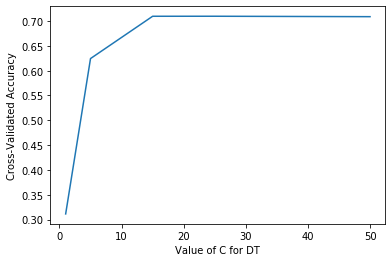

In [15]:
# plot the value of K for KNN (x-axis) versus the cross-validated accuracy (y-axis)
plt.plot(max_depth, k_scores)
plt.xlabel('Value of C for DT')
plt.ylabel('Cross-Validated Accuracy')

## Conclusion :<br>
See the time taken by LOOCV to validate and K-fold 

# Traning with best hyperparameters

In [17]:
from sklearn.metrics import r2_score
clf = DecisionTreeRegressor(criterion='mse',max_depth=10,min_samples_split=2)

clf.fit(X_train, y_train)


y_test_pred = clf.predict(X_test)

print(r2_score(y_test,y_test_pred))

0.6544341667217802


dot: graph is too large for cairo-renderer bitmaps. Scaling by 0.53201 to fit



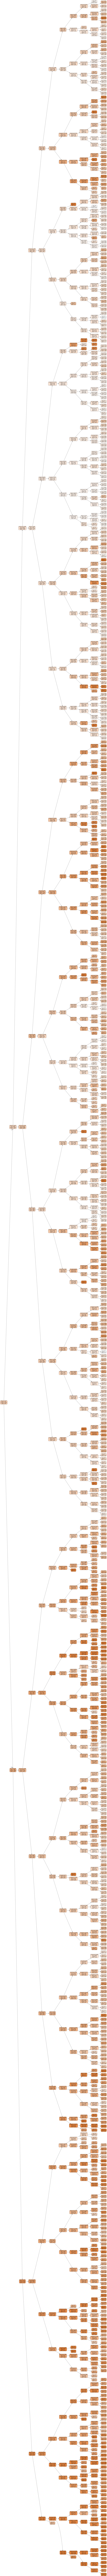

In [18]:
#https://scikit-learn.org/stable/modules/generated/sklearn.tree.export_graphviz.html
import pydotplus
from sklearn.tree import export_graphviz
from IPython.display import Image
from sklearn.externals.six import StringIO

dot_data = StringIO()

export_graphviz(clf, out_file=dot_data, filled=True, rounded=True, special_characters=True, feature_names=X_train.columns,rotate=True)
graph = pydotplus.graph_from_dot_data(dot_data.getvalue())

Image(graph.create_png())

# Model 6 : Ensemble Techniques 

## A. Bagging

In [19]:
#https://scikit-learn.org/stable/modules/generated/sklearn.ensemble.RandomForestClassifier.html
from sklearn.model_selection import GridSearchCV
from sklearn.ensemble import RandomForestRegressor


parameters = {'max_depth': [5, 10, 50, 100],'n_estimators':[10, 20 , 50, 100]}
RF = RandomForestRegressor( criterion='mse')

model = GridSearchCV(RF,parameters, cv=3)

model.fit(X_train, y_train)    

print(model.best_estimator_)
print(model.score(X_train, y_train))


RandomForestRegressor(bootstrap=True, criterion='mse', max_depth=50,
                      max_features='auto', max_leaf_nodes=None,
                      min_impurity_decrease=0.0, min_impurity_split=None,
                      min_samples_leaf=1, min_samples_split=2,
                      min_weight_fraction_leaf=0.0, n_estimators=100,
                      n_jobs=None, oob_score=False, random_state=None,
                      verbose=0, warm_start=False)
0.9742082794013341


In [21]:
from sklearn.model_selection import GridSearchCV

RF=RandomForestRegressor(max_depth=50,n_estimators=100,criterion='mse' )
RF.fit(X_train, y_train)

y_test_pred = RF.predict(X_test)

print(r2_score(y_test,y_test_pred))

0.802108983723212


# Boosting

In [ ]:
#https://scikit-learn.org/stable/modules/generated/sklearn.ensemble.RandomForestClassifier.html
from sklearn.model_selection import GridSearchCV
from sklearn.ensemble import GradientBoostingRegressor


parameters = {'max_depth': [5, 10, 50, 100],'n_estimators':[10, 20 , 50, 100]}

clf = GradientBoostingRegressor()

model = GridSearchCV(clf,parameters, cv=3)

model.fit(X_train, y_train)    

print(model.best_estimator_)
print(model.score(X_test, y_test))


In [102]:
from sklearn.model_selection import GridSearchCV

clf=GradientBoostingRegressor(max_depth=5,n_estimators=100)
clf.fit(X_train, y_train)

y_test_pred = clf.predict(X_test)

print(r2_score(y_test,y_test_pred))

0.9986810006637977


## Note: As we have very less data stascking is not advisable 

# Xgboost

In [105]:
import xgboost as xgb
xgb_model = xgb.XGBRegressor(random_state=42)

xgb_model.fit(X_train, y_train)


y_test_pred = xgb_model.predict(X_test)

print(r2_score(y_test,y_test_pred))



[17:07:10] WARNING: C:/Jenkins/workspace/xgboost-win64_release_0.90/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
0.9936941866761756


# 6.Model Comparison

In [1]:
#https://stackoverflow.com/questions/18601688/python-prettytable-example

from prettytable import PrettyTable
table = PrettyTable()

#setting column names
table.field_names = [ "Model", "r2_score"]

#setting row values
table.add_row(["KNN", '0.6266' ])
table.add_row(["Linear Regression" ,'0.6347' ])
table.add_row(["SVM", '0.883' ])
table.add_row(["Decision Tree",'0.6544' ])
table.add_row(["RandomForest",'0.8021' ])
table.add_row(["GBDT" ,'0.9986' ])
table.add_row(["Xgboost",'0.9936' ])

print(table)

+-------------------+----------+
|       Model       | r2_score |
+-------------------+----------+
|        KNN        |  0.6266  |
| Linear Regression |  0.6347  |
|        SVM        |  0.883   |
|   Decision Tree   |  0.6544  |
|    RandomForest   |  0.8021  |
|        GBDT       |  0.9986  |
|      Xgboost      |  0.9936  |
+-------------------+----------+


### Conclusion:<br>
1.As we have considerable amount of data ensembles like GBDT performed extremly well<br>
2.As the interpretabiity is not the big issue in this problem so GBDT is out final model.

# 7.Creating Submission File

In [ ]:
best_model=GBDT
from sklearn.externals import joblib
filename = 'finalized_model.sav'
joblib.dump(best_model, filename)